# Problem 2 - Answers

**Time independent perturbation theory**

In your problem sheets you have calculated the first order corrections to the ground state energy and eigenfunction of a particle in a perturbed infinite square well. In this question you will expand this analysis to higher order.

The potential for this perturbed infinite square well is given by

$V = \infty$ for $x < 0$,&nbsp; &nbsp; &nbsp;$V = \delta$ for $0 < x < a$,&nbsp; &nbsp; &nbsp;$V = 0$ for $a < x < L$,&nbsp; &nbsp; &nbsp;$V = \infty$ for $x > L$.

For the rest of this question assume an electron is confined in the perturbed potential well with  $L = 1\times10^{-10}$ m, $a = 5\times10^{-11}$ m and $\delta = 1\times10^{-19}$ J.

1. Verify that $\delta$ << E1.

The energy eigenstates for the infinite square well are

$$ E_n = \frac{\pi^2\hbar^2n^2}{{8ma}^2}. $$

In [1]:
# Import libraries we will need and define constants
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

hbar = 1.05e-34
m_e = 9.11e-31
a = 5e-11
L = 1e-10
delta = 1e-19

# Create a function to work out the energy of the infinte square well
# I have re-used the functions that you saw in lectures
def En(n, L=1.0, m =m_e):
    """
    Energy eigenvalues
    n - integer quantum number
    """
    
    En = np.pi**2 * n**2 * hbar**2 / (2.0 * m * L**2)
    return En

#We will also need the energy eigenstates for later
def un(x, n, L=1.0):
    """
    Energy eigenstates for infinite square well
    x - 1D position in meters
    n - integer quantum number
    L - width of well (well runs 0 to L)
    """
    norm = np.sqrt(2/L)
    kx = n * np.pi * x / L
    un = norm * np.sin(kx)
    
    # Wavefunction is 0 outside well
    un = np.where(np.logical_and(x>0, x<L), un, 0)
    return un

print("E1 = ", En(1, L))
print("delta = ", delta)

E1 =  5.972139874973115e-18
delta =  1e-19


We have verified that $\delta$ << E1.


2. Calculate the first order shift in the energy of the ground state and compare this to the value you found by hand.

The first order correction to the energy is

$$E_{n}^{(1)} = \int_{-\infty}^{-\infty} u^{*}_{n}\,\delta\,u_{n} dx,$$

which we can represent as a function using `scipy.integrate.quad` to perform the integration.

In [2]:
def energy_perturbation(x, u, V_perturbation):
    
    """
    x - 1D position in meters
    u - eigenstate of unperturbed system
    V_perturbation - potential of the perturbation
    """
    # Turn the eigenstate into a function which we can solve using scipy.quad
    u_function = interp1d(x, u)
    def to_intergrate(dummy):
        return np.conj(u_function(dummy))*V_perturbation(dummy)*u_function(dummy)
    intergral, uncertainty = quad(to_intergrate, x[0], x[-1])
    return intergral, uncertainty

# Define x coordinates
x = np.linspace(-a, L+a, 500)

# Define peturbed potential as a function
def V1(x):
    return np.where(np.logical_and(x>0, x<a), delta, 0)

E1 = En(1, a*2, m=m_e)
u1 = un(x, 1, a*2)
delta_E, numerical_uncertainty = energy_perturbation(x, u1, V1)
print("Energy change: ({:.2f}+/-{:.2f})e-20".format(delta_E/1e-20, numerical_uncertainty/1e-20))
print("Delta/2: {:.2f}e-20".format(delta/2e-20))

Energy change: (5.00+/-0.00)e-20
Delta/2: 5.00e-20


Performing the calculation by hand we find that the change in energy is $\frac{\delta}{2}$, which is consistent with our numerical calculation.

3. Find the perturbed ground state wavefunction. Compare the calculated $a_{12}$ co-efficient to the value you found by hand.
Plot the unperturbed and perturbed wavefunctions and the difference between them.
    
The equation for the eigenstates of the perturbed potential is

$$ u_n^{(1)}(x) = \sum_{m \neq n}a_{nm}u_m(x) = \sum_{m \neq n} \left(\frac{\int_{-\infty}^{-\infty} u^{*}_{n}\,\delta\,u_{n} dx}{E_n - E_m}\right)u_m(x). $$

The eigenfunctions of the perturbed system depend on the energies and wavefunctions of all the eigenstates of the infinite square well, though the amount of overlap decreases as the eigenstates get further apart.

Expected value of a12 = 2.344218e-03
a 1 2 = -2.368850e-03
a 1 3 = 8.788849e-12
a 1 4 = 1.895079e-04
a 1 5 = -1.431892e-11
a 1 6 = -5.221134e-05
a 1 7 = 2.828768e-12
a 1 8 = 2.148613e-05
a 1 9 = -8.543240e-12
a 1 10 = -1.087624e-05
a 1 11 = -3.873320e-12
a 1 12 = 6.255419e-06
a 1 13 = -6.780229e-12
a 1 14 = -3.924550e-06
a 1 15 = 6.618056e-10
a 1 16 = 2.624761e-06
a 1 17 = 4.319224e-09
a 1 18 = -1.828913e-06
a 1 19 = 2.658317e-08
a 1 20 = 1.413080e-06


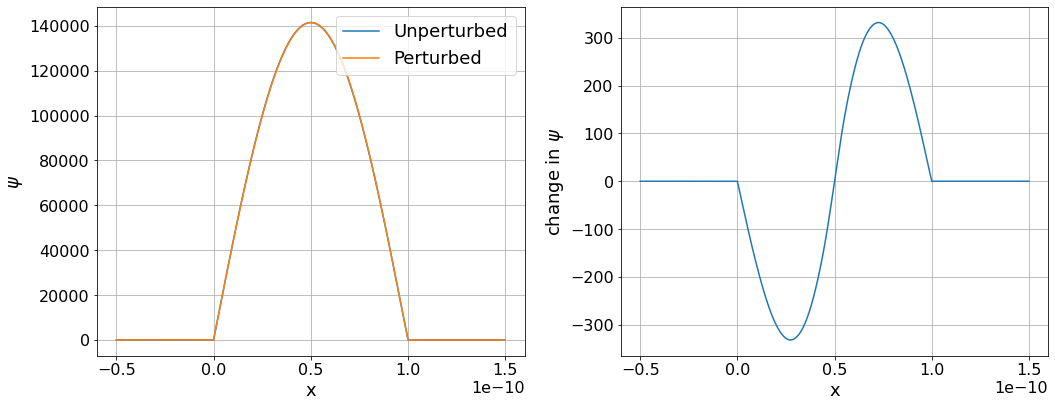

In [3]:
# Define function that will perform the wavefunction perturbation
def wavefunction_perturbation(x, n, V_perturbation, energy_levels, wavefunctions, show_a=False):
    """
    x - 1D position in meters
    n - quantum number of the eigenstate to calculate
    V_perturbation - potential of the perturbation
    energy_levels - list of energy levels of the unperturbed system
    wavefunctions - list of wavefunctions of the unperturbed system
    show_a - print out the coefficients
    """
    #This is to account for the fact that python counts from 0
    #and we define our energy levels starting at 1
    u_n = interp1d(x, wavefunctions[n-1])
    energy_n = energy_levels[n-1]
    u_out = wavefunctions[n-1].copy()
    
    # Loop through every eigenfunction where m is not equal to n
    for m in range(1, len(energy_levels)+1):
        if m==n:
            continue
        energy_multiplier = 1 / (energy_n - energy_levels[m-1])
        u_m_function = interp1d(x, wavefunctions[m-1])
        
        def integral(dummy):
            return np.conj(u_m_function(dummy))*V_perturbation(dummy)*u_n(dummy)
        
        overlap_intergral, _ = quad(integral, x[0], x[-1])
        contribution = energy_multiplier * overlap_intergral * wavefunctions[m-1]
        if show_a:
            print("a %i %i = %e" % (n, m, energy_multiplier * overlap_intergral))
        u_out += contribution
    return u_out

# Calculate the perturbed ground state wavefunction
# Define x coordinates
x = np.linspace(-a, L+a, 10000)

# Define peturbed potential as a function
def V1(x):
    return np.where(np.logical_and(x>0, x<a), delta, 0)

# Define number of eigenfunctions to calculate
n_eigenfunctions = 20

# Create a list of unpeturbed energies and unperturbed eigenfunctions
energy_unperturbed = []
eigenfunction_unperturbed = []

for n in range(1, n_eigenfunctions+1):
    energy_unperturbed.append(En(n, L, m_e))
    eigenfunction_unperturbed.append(un(x, n, L=L))

# Print coefficient we are expecting for a12
print("Expected value of a12 = %e" % (0.14*delta/energy_unperturbed[0]))

# Calculate the perturbed ground state
perturbed_wavefunction = wavefunction_perturbation(x, 1, V1, 
                                                   energy_unperturbed,
                                                   eigenfunction_unperturbed,
                                                   show_a=True)

# Plot wavefunctions and difference between them
params = {
'axes.labelsize': 18,
'font.size': 18,
'legend.fontsize': 18,
'xtick.labelsize': 16,
'ytick.labelsize': 16,
'figure.figsize': [15, 6] 
}
plt.rcParams.update(params)
fig1, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.plot(x, eigenfunction_unperturbed[0], label="Unperturbed")
ax1.plot(x, perturbed_wavefunction, label="Perturbed")
ax1.set(xlabel="x", ylabel="$\psi$")
ax1.legend(loc=1)
ax1.grid()

ax2.plot(x, perturbed_wavefunction- eigenfunction_unperturbed[0])
ax2.set(xlabel="x", ylabel="change in $\psi$")
ax2.grid()

fig1.tight_layout()

We've found the same behaviour as we saw in the problem sheet, with the wavefunction shifting towards the lower potential at the right side of the well. The sign of the co-efficient is different because our potential well runs from 0 to L whereas the potential well in the problem sheet runs from -L/2 to L/2.

4. By repeatedly applying the functions you have just created, calculate the higher order approximations for the ground state energy. How many iterations are required for the size of the energy shift to halve compared to the first iteration?

For the second order approximation, we need to repeat the above procedure with the state or energy being assumed to be, not just un or En, but the corrected values we just calculated. The next order approximation is then done in an equivalent way, and so on.

In [4]:
# Run perturbation 500 times
# Note: it would be more efficient to use a while loop here but I want to calculate extra values to plot

iterations_to_run = 500
wavefunctions_to_use = 20

# This will be a list where each item is a list of energy levels for that iteration
all_energy_levels = []
all_wavefunctions = []

energy_levels_unperturbed = []
wavefunctions_unperturbed = []

# Calculate energy levels and eigenstates for the unpertubed infinte square well
for i in range(1, wavefunctions_to_use+1):
    energy_levels_unperturbed.append(En(i, L, m=m_e))
    wavefunctions_unperturbed.append(un(x, i, L))

# Add these to the master list
all_energy_levels.append(energy_levels_unperturbed)
all_wavefunctions.append(wavefunctions_unperturbed)
    
# This is where we will store the ground state energy and changes in the ground state energy
change_E1 = []

for j in range(iterations_to_run):
    new_energy_levels = []
    delta_Es = []
    new_wavefunctions = []

    for i in range(wavefunctions_to_use):
        delta_E, _ = energy_perturbation(x, all_wavefunctions[j][i].copy(), V1)
        delta_Es.append(delta_E)
        new_energy_levels.append(all_energy_levels[j][i]+delta_E)

        new_wavefunction = wavefunction_perturbation(x, i+1, V1, all_energy_levels[j], all_wavefunctions[j].copy())
        new_wavefunctions.append(new_wavefunction)
    
    # Calculate the percentage change in enegy compared to E1 for the ground state
    change_E1.append(delta_Es[0])
    all_energy_levels.append(new_energy_levels)
    all_wavefunctions.append(new_wavefunctions)

The energy shift is less than half the original energy shift after 141 iterations


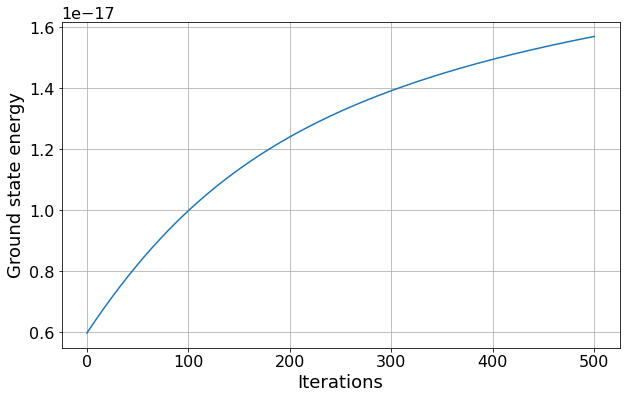

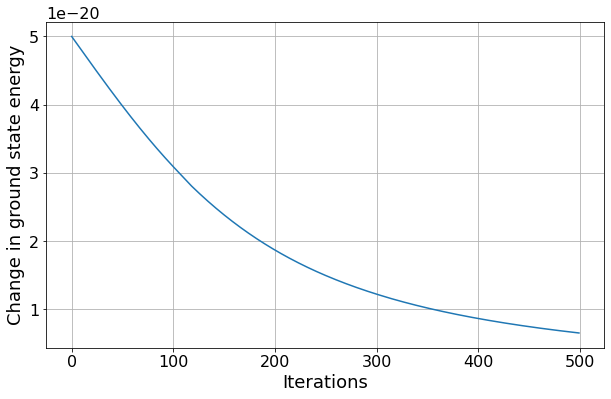

In [5]:
#Print and plot results

#Find first index where value has reduced by half
iteration = next(idx for idx, val in enumerate(change_E1) if val < 0.5*change_E1[0])
print("The energy shift is less than half the original energy shift after %i iterations" % iteration)

params = {
'axes.labelsize': 18,
'font.size': 18,
'legend.fontsize': 18,
'xtick.labelsize': 16,
'ytick.labelsize': 16,
'figure.figsize': [10, 6] 
}
plt.rcParams.update(params)
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.plot([E[0] for E in all_energy_levels])
ax1.set(xlabel="Iterations", ylabel="Ground state energy")
ax1.grid()

fig2, ax2 = plt.subplots(nrows=1, ncols=1)
ax2.plot(change_E1)
ax2.set(xlabel="Iterations", ylabel="Change in ground state energy")
ax2.grid()